## EDA with Images

The following code explores the image set for the Kaggle competition "Plant Seedlings Classification". The data for this repo can be downloaded from https://www.kaggle.com/pavanireddyv/plant-seedling-classification-cnn/data.

## Reading and Displaying Images

1. Setup
2. Displaying Images Individually
3. Displaying Multiple Images
4. Displaying Images as a Labeled Grid

### 1. Setup

In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from random import randint

C:\Users\Richard\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Set up paths
train_path = 'train'
test_path = 'test'

In [3]:
categories = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categories = len(categories)

In [4]:
for category in categories:
    print('{}: {} images'.format(category, len(os.listdir(os.path.join(train_path, category)))))

Black-grass: 263 images
Charlock: 390 images
Cleavers: 287 images
Common Chickweed: 611 images
Common wheat: 221 images
Fat Hen: 475 images
Loose Silky-bent: 654 images
Maize: 221 images
Scentless Mayweed: 516 images
Shepherds Purse: 231 images
Small-flowered Cranesbill: 496 images
Sugar beet: 385 images


In [5]:
train_list = []
for category_id, category in enumerate(categories):
    for file in os.listdir(os.path.join(train_path, category)):
        train_list.append([category_id, 'train/{}/{}'.format(category, file), category])
train_df = pd.DataFrame(train_list, columns=['category_id', 'file', 'category'])

In [6]:
train_df.shape[0]

4750

### 1. Displaying Images Individually

In [7]:
def read_img(filepath, size):
    # Convert image to array
    img = image.load_img(filepath, target_size=size)
    img = image.img_to_array(img)
    return img

def display_img(filepath, size):
    # Display a specific image
    print(filepath)
    img = read_img(filepath['file'], size)
    plt.imshow(img/255.)
    plt.title(filepath['category'])
    plt.axis('off')
    
def display_random_image(df):
    # Display a random image
    r = randint(0,df.shape[0])
    file_loc = train_df.iloc[r]
    display_img(file_loc, (244,244))
    
def display_random_image_from_category(df, category):
    df = df[df['category'] == category]
    r = randint(0,df.shape[0])
    file_loc = df.iloc[r]
    display_img(file_loc, (244,244))

category_id                               1
file           train/Charlock/67e37de9b.png
category                           Charlock
Name: 400, dtype: object


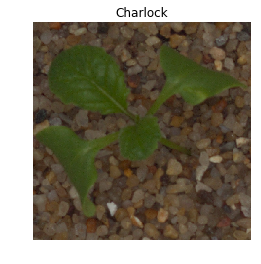

In [8]:
display_img(train_df.iloc[400], (224,224))

category_id                                       6
file           train/Loose Silky-bent/fe2016da9.png
category                           Loose Silky-bent
Name: 2893, dtype: object


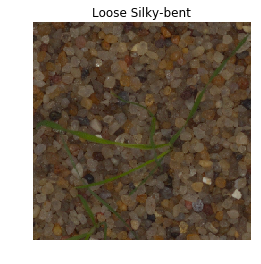

In [9]:
display_random_image(train_df)

category_id                               1
file           train/Charlock/17fa6cd9c.png
category                           Charlock
Name: 300, dtype: object


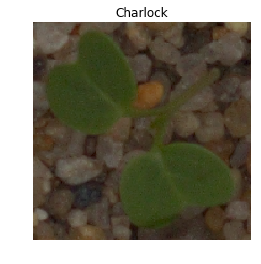

In [10]:
display_random_image_from_category(train_df, "Charlock")

### 2. Displaying Multiple Images

In [11]:
def plot_9_random_images(df):
    # Plots nine random images
    fig, ax = plt.subplots(3,3,figsize=(12,12))
    fig.tight_layout()
    for i in range(0,3):
        for j in range(0,3):
            file_loc = train_df.iloc[randint(0,df.shape[0])]
            ax[i,j].imshow(read_img(file_loc['file'], (224,224))/255.)
            ax[i,j].set_title(file_loc['category'])
            ax[i,j].axis('off')

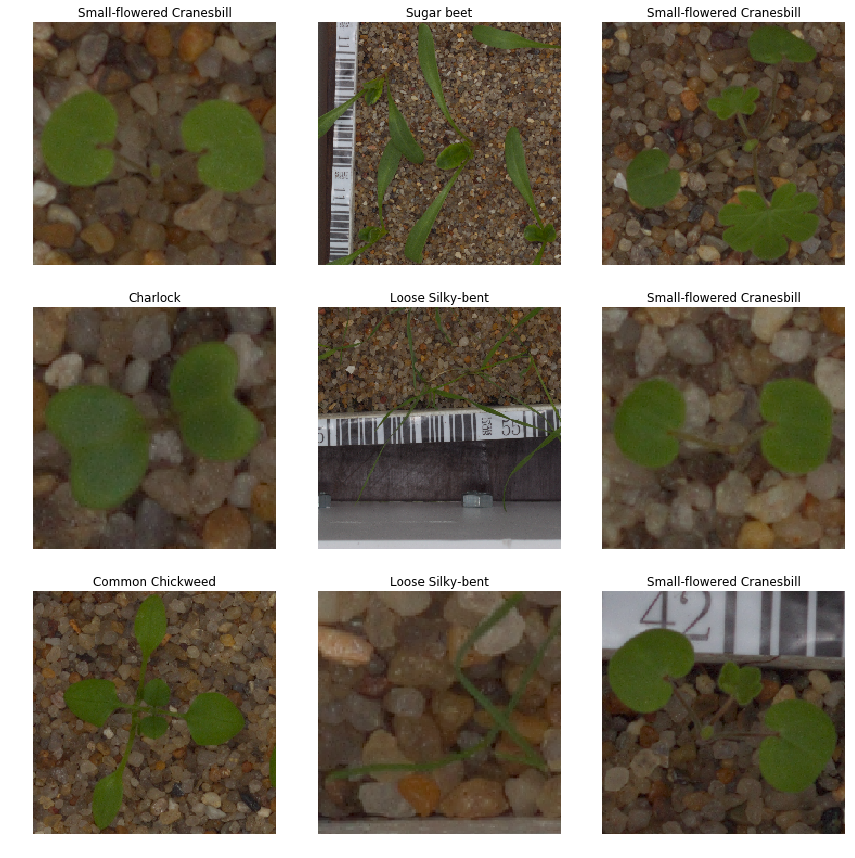

In [12]:
plot_9_random_images(train_df)

### 3. Displaying Images as a Labeled Grid

In [13]:
def plot_image_grid():
    fig = plt.figure(1, figsize=(num_categories, num_categories))
    grid = ImageGrid(fig, 111, nrows_ncols=(num_categories, num_categories), axes_pad=0.05)
    i = 0
    for category_id, category in enumerate(categories):
        for filepath in train_df[train_df['category'] == category]['file'].values[:num_categories]:
            ax = grid[i]
            img = read_img(filepath, (224, 224))
            ax.imshow(img / 255.)
            ax.axis('off')
            if i % num_categories == num_categories - 1:
                ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
            i += 1
    plt.show()

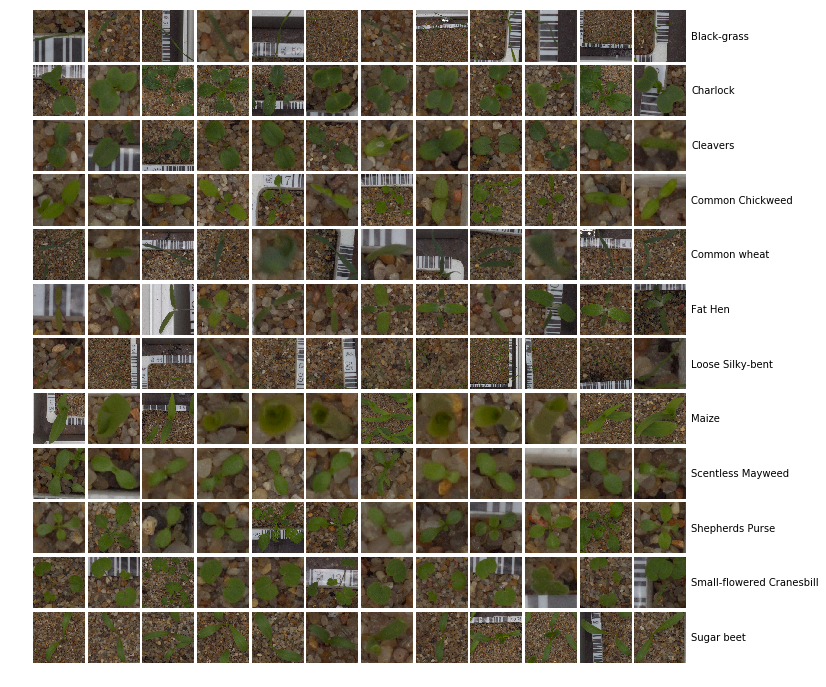

In [14]:
plot_image_grid()